In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r"C:\Users\saman\Desktop\Gyrase\dna_gyrase_bioactivity_data_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,5.0,active
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,10.0,active
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,5.0,active
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,72.2,active
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,664.0,active
...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,100000.0,inactive
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,100000.0,inactive
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,445.0,active
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,185.0,active


In [3]:
df1= df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df1,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL187677,5.0,active,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...
1,CHEMBL363449,10.0,active,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
2,CHEMBL8,5.0,active,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O
3,CHEMBL192226,72.2,active,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1
4,CHEMBL371124,664.0,active,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1
...,...,...,...,...
541,CHEMBL5431772,100000.0,inactive,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...
542,CHEMBL5429864,100000.0,inactive,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...
543,CHEMBL5394250,445.0,active,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...
544,CHEMBL5406927,185.0,active,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...


Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

1) Molecular weight < 500 Dalton
2) Octanol-water partition coefficient (LogP) < 5
3) Hydrogen bond donors < 5
4) Hydrogen bond acceptors < 10

Calculate Descriptors

In [6]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

def lipinski(smiles, verbose=False):
    baseData = []  # List of lists
    i = 0  
    
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        if mol is not None:
            mw = Descriptors.MolWt(mol)
            logp = Descriptors.MolLogP(mol)
            h_donors = Descriptors.NumHDonors(mol)
            h_acceptors = Descriptors.NumHAcceptors(mol)

            baseData.append([mw, logp, h_donors, h_acceptors])  # Append as a list

            if verbose:
                print(f"{i}: Processed {elem} -> MW: {mw}, LogP: {logp}, HDonors: {h_donors}, HAcceptors: {h_acceptors}")
        i += 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)  # Ensure 2D structure
    
    return descriptors


In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles.tolist())
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,360.385,2.3071,2,5
1,360.385,2.3071,2,5
2,331.347,1.5833,2,5
3,367.327,2.1274,1,5
4,367.327,2.1274,1,5
...,...,...,...,...
541,506.347,5.0467,1,5
542,535.357,4.7497,1,5
543,463.868,3.9264,1,6
544,508.319,4.0355,1,6


In [8]:
df


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,5.0,active
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,10.0,active
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,5.0,active
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,72.2,active
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,664.0,active
...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,100000.0,inactive
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,100000.0,inactive
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,445.0,active
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,185.0,active


In [9]:
df_combined= pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,5.0,active,360.385,2.3071,2,5
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,10.0,active,360.385,2.3071,2,5
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,5.0,active,331.347,1.5833,2,5
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,72.2,active,367.327,2.1274,1,5
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,664.0,active,367.327,2.1274,1,5
...,...,...,...,...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,100000.0,inactive,506.347,5.0467,1,5
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,100000.0,inactive,535.357,4.7497,1,5
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,445.0,active,463.868,3.9264,1,6
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,185.0,active,508.319,4.0355,1,6


Convert IC50 to pIC50

In [10]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [11]:
df_combined.standard_value.describe()

count       546.000000
mean      31804.536731
std       93435.208836
min           0.001000
25%          44.750000
50%         900.000000
75%       10150.000000
max      800000.000000
Name: standard_value, dtype: float64

In [12]:
-np.log10( (10**-9)* 100000000 )

1.0

In [13]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value_norm', axis=1)

        
    return x

In [19]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,5.0,active,360.385,2.3071,2,5
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,10.0,active,360.385,2.3071,2,5
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,5.0,active,331.347,1.5833,2,5
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,72.2,active,367.327,2.1274,1,5
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,664.0,active,367.327,2.1274,1,5
...,...,...,...,...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,100000.0,inactive,506.347,5.0467,1,5
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,100000.0,inactive,535.357,4.7497,1,5
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,445.0,active,463.868,3.9264,1,6
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,185.0,active,508.319,4.0355,1,6


In [20]:
df_norm['standard_value'] = df_norm['standard_value'].astype(float)


In [21]:
print(df_norm[['standard_value']].head())


   standard_value
0             5.0
1            10.0
2             5.0
3            72.2
4           664.0


In [24]:
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value']:
        molar = i * (10**-9)  # Convert nanomolar to molar
        pIC50.append(-np.log10(molar))  # Calculate pIC50
    
    input['pIC50'] = pIC50  # Add new column
    x = input.drop('standard_value', axis=1)  # Corrected drop method

    return x


In [25]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,active,360.385,2.3071,2,5,8.301030
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,active,360.385,2.3071,2,5,8.000000
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,active,331.347,1.5833,2,5,8.301030
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,active,367.327,2.1274,1,5,7.141463
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,active,367.327,2.1274,1,5,6.177832
...,...,...,...,...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,inactive,506.347,5.0467,1,5,4.000000
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,inactive,535.357,4.7497,1,5,4.000000
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,active,463.868,3.9264,1,6,6.351640
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,active,508.319,4.0355,1,6,6.732828


In [26]:
df_final.pIC50.describe()

count    546.000000
mean       6.219600
std        1.671627
min        3.096910
25%        4.993550
50%        6.046429
75%        7.349386
max       12.000000
Name: pIC50, dtype: float64

In [27]:
df_final.to_csv('dna_gyrase_bioactivity_data_class_pIC50.csv')

Removing the intermediate bioactivity class

In [28]:
df2= df_final[df_final['class'] != 'intermediate']
df2

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187677,C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)...,active,360.385,2.3071,2,5,8.301030
1,CHEMBL363449,CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,active,360.385,2.3071,2,5,8.000000
2,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,active,331.347,1.5833,2,5,8.301030
3,CHEMBL192226,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C\F)c3c2F)CC1,active,367.327,2.1274,1,5,7.141463
4,CHEMBL371124,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(/C=C/F)c3c2F)CC1,active,367.327,2.1274,1,5,6.177832
...,...,...,...,...,...,...,...,...
541,CHEMBL5431772,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4cc(F)c(Br...,inactive,506.347,5.0467,1,5,4.000000
542,CHEMBL5429864,COc1ccc2nccc(OC[C@H]3CC[C@H](NC(=O)c4ccc(I)c(F...,inactive,535.357,4.7497,1,5,4.000000
543,CHEMBL5394250,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,active,463.868,3.9264,1,6,6.351640
544,CHEMBL5406927,COc1ccc2nccc(OC[C@@H]3CC[C@@H](NC(=O)c4cc(F)c(...,active,508.319,4.0355,1,6,6.732828


In [29]:
df2['class'].value_counts()


class
active      284
inactive    138
Name: count, dtype: int64

Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [30]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

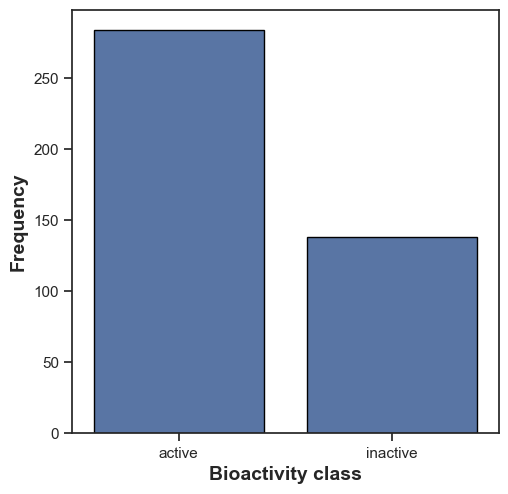

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df2, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP

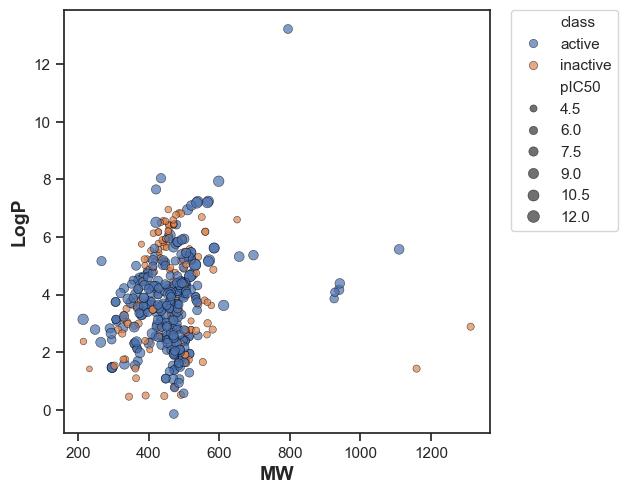

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df2, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

Box Plots

Text(0, 0.5, 'pIC50 value')

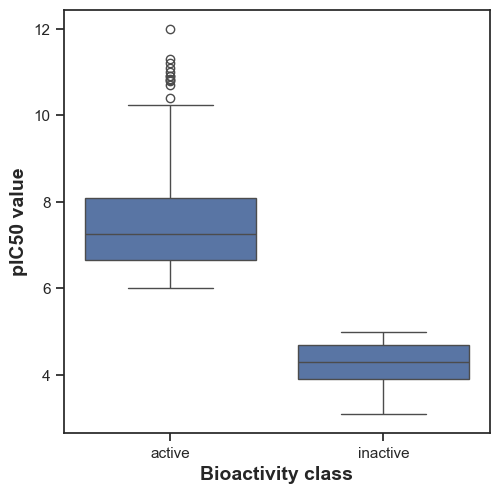

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('plot_ic50.pdf')
     